In [251]:
!pip install graphviz

### Import Files

In [253]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [254]:
df = pd.read_csv(r"C:\Users\Predator\Downloads\loan-test.csv")

In [255]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [256]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [257]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [259]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [260]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

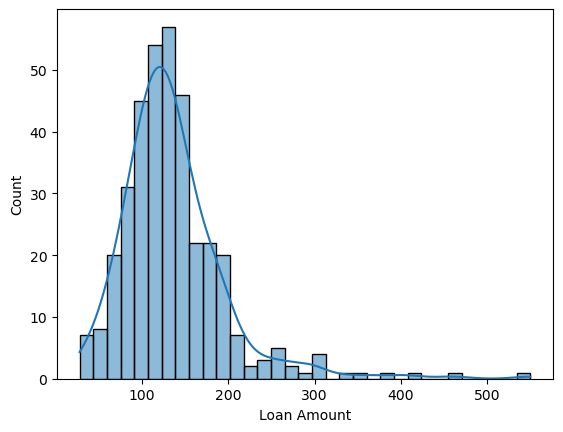

In [262]:
sns.histplot(df['LoanAmount'], kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Count')

Text(0, 0.5, 'Loan Amount')

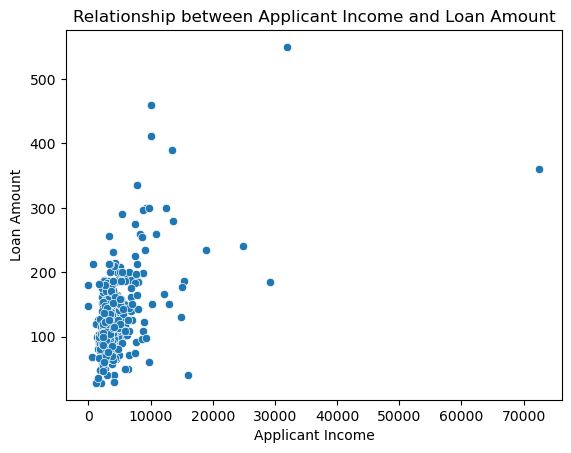

In [263]:
sns.scatterplot(df, x = 'ApplicantIncome', y = 'LoanAmount')
plt.title('Relationship between Applicant Income and Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')

In [264]:
null_values = df.isnull()
null_values

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
362,False,False,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False,False,False,False,True,False
365,False,False,False,False,False,False,False,False,False,False,False,False


In [265]:
print("Missing values in 'Credit_History' before filling: ", df['Credit_History'].isnull().sum())
df['Credit_History'].fillna(0, inplace = True)
print("Missing values in 'Credit_History' after filling:", df['Credit_History'].isnull().sum())

Missing values in 'Credit_History' before filling:  29
Missing values in 'Credit_History' after filling: 0


C:\Users\Predator\AppData\Local\Temp\ipykernel_13452\835669351.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(0, inplace = True)


In [266]:
print("Missing values in 'Credit_History' before filling: ", df['Credit_History'].isnull().sum())
mode_CrHistory = df['Credit_History'].mode()[0]
df['Credit_History'].fillna(mode_CrHistory, inplace = True)
print("Missing values in 'Credit_History' after filling: ", df['Credit_History'].isnull().sum())

Missing values in 'Credit_History' before filling:  0
Missing values in 'Credit_History' after filling:  0


C:\Users\Predator\AppData\Local\Temp\ipykernel_13452\2925273629.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(mode_CrHistory, inplace = True)


In [267]:
print("Missing values in 'Credit_History' before filling: ", df['Credit_History'].isnull().sum())
df['Credit_History'] - pd.to_numeric(df['Credit_History'], errors = 'coerce')
mean_CrHistory = df['Credit_History'].mean()
df['Credit_History'].fillna(mean_CrHistory, inplace = True)
print("Missing values in 'Credit_History' after filling: ", df['Credit_History'].isnull().sum())

Missing values in 'Credit_History' before filling:  0
Missing values in 'Credit_History' after filling:  0


C:\Users\Predator\AppData\Local\Temp\ipykernel_13452\3342571339.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(mean_CrHistory, inplace = True)


In [268]:
df = pd.DataFrame({
    'Credit_History': [1, 2, None, None, None]
})
mean_value = df['Credit_History'].mean()
df['Credit_History'].fillna(mean_value, inplace = True)
print(df['Credit_History'])

0    1.0
1    2.0
2    1.5
3    1.5
4    1.5
Name: Credit_History, dtype: float64


C:\Users\Predator\AppData\Local\Temp\ipykernel_13452\1718285092.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(mean_value, inplace = True)


In [269]:
duplicate_rows = df[df.duplicated()]

In [270]:
num_duplicate_rows = len(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 2


In [271]:
df[df.duplicated()]
len(duplicate_rows)

2

In [272]:
df.drop_duplicates(keep = 'first')

,Credit_History
0,1.0
1,2.0
2,1.5


In [273]:
df.duplicated(subset = ['Credit_History'])

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [274]:
df.drop_duplicates(subset = ['Credit_History'], keep = 'first')

,Credit_History
0,1.0
1,2.0
2,1.5


In [275]:
from sklearn.preprocessing import MinMaxScaler

In [276]:
df = pd.read_csv(r"C:\Users\Predator\Downloads\loan-test.csv")
print("Original Data: ")
df.head()
print("\nLoan Amount column before normalization: ")
print(df['LoanAmount'].describe())

Original Data: 

Loan Amount column before normalization: 
count    362.000000
mean     136.132597
std       61.366652
min       28.000000
25%      100.250000
50%      125.000000
75%      158.000000
max      550.000000
Name: LoanAmount, dtype: float64


In [277]:
scaler = MinMaxScaler()
df['LoanAmount'] = scaler.fit_transform(df[['LoanAmount']])
print("\nData after normalization")
df.head()
print("\nLoan Amount column after normalization")
print(df['LoanAmount'].describe())


Data after normalization

Loan Amount column after normalization
count    362.000000
mean       0.207151
std        0.117561
min        0.000000
25%        0.138410
50%        0.185824
75%        0.249042
max        1.000000
Name: LoanAmount, dtype: float64


In [278]:
categorical_columns = ['Gender', 'Married']
data_encoded = pd.get_dummies(df, columns = categorical_columns)
data_encoded[['Gender_Male', 'Gender_Female', 'Married_Yes', 'Married_No']].head()

,Gender_Male,Gender_Female,Married_Yes,Married_No
0,True,False,True,False
1,True,False,True,False
2,True,False,True,False
3,True,False,True,False
4,True,False,False,True


In [279]:
label_encoder = LabelEncoder()

In [280]:
df.select_dtypes(include=['object']).columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [281]:
categorical_cols = ['Gender', 'Married', 'Dependents','Education','Self_Employed', 'Property_Area']

In [282]:
# Label encode categorical columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [366]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
dtype: object

In [283]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,0.157088,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,0.187739,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,0.344828,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,0.137931,360.0,NaN,2
4,LP001051,1,0,0,1,0,3276,0,0.095785,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4009,1777,0.162835,360.0,1.0,2
363,LP002975,1,1,0,0,0,4158,709,0.166667,360.0,1.0,2
364,LP002980,1,0,0,0,0,3250,1993,0.187739,360.0,NaN,1
365,LP002986,1,1,0,0,0,5000,2393,0.249042,360.0,1.0,0


In [284]:
df['Credit_History'].unique()  # To see the unique values

array([ 1., nan,  0.])

In [285]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

C:\Users\Predator\AppData\Local\Temp\ipykernel_13452\1608471621.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [286]:
# Convert Credit_History to integer type
df['Credit_History'] = df['Credit_History'].astype(int)

In [287]:
# Check the unique values
print(df['Credit_History'].unique())  # Should print [0, 1] or [1, 0] after cleaning

[1 0]


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int32  
 2   Married            367 non-null    int32  
 3   Dependents         367 non-null    int32  
 4   Education          367 non-null    int32  
 5   Self_Employed      367 non-null    int32  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     367 non-null    int32  
 11  Property_Area      367 non-null    int32  
dtypes: float64(2), int32(7), int64(2), object(1)
memory usage: 24.5+ KB


In [289]:
x = df.drop(['Credit_History'], axis = 1)
y = df['Credit_History']

In [290]:
y

0      1
1      1
2      1
3      1
4      1
      ..
362    1
363    1
364    1
365    1
366    1
Name: Credit_History, Length: 367, dtype: int32

In [291]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

In [292]:
x = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Property_Area']]
y = df['Credit_History']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("Training set shape: ", x_train.shape, y_train.shape)
print("Testing set shape: ", x_test.shape, y_test.shape)

Training set shape:  (293, 4) (293,)
Testing set shape:  (74, 4) (74,)


In [293]:
model = DecisionTreeClassifier()

In [350]:
model = DecisionTreeClassifier(criterion='entropy', max_depth = 3)

In [352]:
model.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [354]:
model.feature_importances_

array([0.24260792, 0.24324495, 0.51414712, 0.        ])

In [356]:
feature_names = x.columns.tolist()

In [358]:
feature_names

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Property_Area']

In [360]:
class_names = df['Credit_History'].unique().tolist()

In [362]:
class_names

[1, 0]

[Text(0.5555555555555556, 0.875, 'x[0] <= 2885.5\nentropy = 0.636\nsamples = 367\nvalue = [59.0, 308.0]'),
 Text(0.3333333333333333, 0.625, 'x[2] <= 0.299\nentropy = 0.851\nsamples = 94\nvalue = [26, 68]'),
 Text(0.4444444444444444, 0.75, 'True  '),
 Text(0.2222222222222222, 0.375, 'x[2] <= 0.073\nentropy = 0.802\nsamples = 90\nvalue = [22, 68]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.853\nsamples = 79\nvalue = [22, 57]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.7777777777777778, 0.625, 'x[1] <= 3146.5\nentropy = 0.532\nsamples = 273\nvalue = [33, 240]'),
 Text(0.6666666666666667, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'x[2] <= 0.181\nentropy = 0.59\nsamples = 232\nvalue = [33, 199]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.377\nsamples = 96\nvalue = [7, 89]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.704\nsamples = 136\nvalue

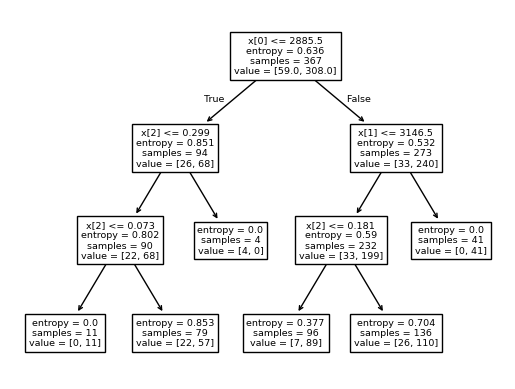

In [364]:
tree.plot_tree(model)